In [1]:
# 내 구글 드라이버에 연동
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# 1.먼저 본인의 Kaggle 계정에서 API Token 을 다운받습니다.(kaggle.json)
# 2.Kaggle API를 설치합니다.
!pip install kaggle   
# 3.kaggle.json 파일을 VM에 업로드 합니다.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"briansong","key":"b8df1a57cafdf55e987c2f7e43d7329a"}'}

In [3]:
# 4.파일이 재대로 업로드 됐는지 확인
!ls -1ha kaggle.json

kaggle.json


In [4]:
# 5.Kaggle API 가 Token을 사용하게 하기 위해 kaggle.json 파일을 ~/.kaggle로 이동 시킵니다.
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
# 6. Permission Warning 이 일어나지 않도록 권한 부여
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Fingerprint Dataset(SOCOFing) URL : https://www.kaggle.com/ruizgara/socofing/home
# 7.Kaggle 에서 Fingerprint dataset을 다운 받기 위해 API Command 를 복사해서 가져옵니다.
!kaggle datasets download -d ruizgara/socofing

 98% 817M/838M [00:28<00:00, 25.0MB/s]
100% 838M/838M [00:28<00:00, 30.6MB/s]


In [6]:
# 압축파일 해제
from zipfile import ZipFile

with ZipFile('socofing.zip') as z: 
    z.extractall()

In [7]:
# dataset을 내 구글 드라이버로 이동시킴 
!cp -r SOCOFing '/content/gdrive/MyDrive/Fingerprint_Recognition'

In [8]:
# 구글 드라이버로 이동된 dataset 확인
!ls '/content/gdrive/MyDrive/Fingerprint_Recognition/SOCOFing'

Altered  Real


In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import glob, os

In [ ]:
# subject_id : 식별자 아이디
# gender(성별): (0:남자, 1:여자)
# lr(왼손/오른손) : (0:왼손, 1:오른손)
# finger(손가락) : (thumb(엄지):0, index(검지):1, middle(중지):2, ring(약지):3, little(새끼):4)

def extract_label(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

def extract_label2(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

In [ ]:
if not os.path.exists('/content/gdrive/MyDrive/Fingerprint_Recognition/dataset'):
  os.makedirs('/content/gdrive/MyDrive/Fingerprint_Recognition/dataset')

6000
(6000, 90, 90, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


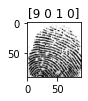

In [ ]:
img_list = sorted(glob.glob('/content/gdrive/MyDrive/Fingerprint_Recognition/SOCOFing/Real/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 90, 90, 1), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = img[2:99,2:92] # 그림 주위의 테두리 제거
    img = cv2.resize(img, (90, 90))
    img = img.flatten()
    imgs[i] = img.reshape(90, 90, -1)
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label(img_path)
    
np.save('/content/gdrive/MyDrive/Fingerprint_Recognition/dataset/x_real.npy', imgs)
np.save('/content/gdrive/MyDrive/Fingerprint_Recognition/dataset/y_real.npy', labels)

print(imgs.shape)
plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1].squeeze(), cmap='gray')

17931
(17931, 90, 90, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


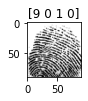

In [ ]:
img_list = sorted(glob.glob('/content/gdrive/MyDrive/Fingerprint_Recognition/SOCOFing/Altered/Altered-Easy/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 90, 90, 1), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = img[2:99,2:92] # 그림 주위의 테두리 제거
    img = cv2.resize(img, (90, 90))
    img = img.flatten()
    imgs[i] = img.reshape(90, 90, -1)
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.save('/content/gdrive/MyDrive/Fingerprint_Recognition/dataset/x_easy.npy', imgs)
np.save('/content/gdrive/MyDrive/Fingerprint_Recognition/dataset/y_easy.npy', labels)

print(imgs.shape)
plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1].squeeze(), cmap='gray')

17067
(17067, 90, 90, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


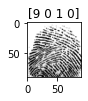

In [ ]:
img_list = sorted(glob.glob('/content/gdrive/MyDrive/Fingerprint_Recognition/SOCOFing/Altered/Altered-Medium/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 90, 90, 1), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = img[2:99,2:92] # 그림 주위의 테두리 제거
    img = cv2.resize(img, (90, 90))
    img = img.flatten()
    imgs[i] = img.reshape(90, 90, -1)
    
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.save('/content/gdrive/MyDrive/Fingerprint_Recognition/dataset/x_medium.npy', imgs)
np.save('/content/gdrive/MyDrive/Fingerprint_Recognition/dataset/y_medium.npy', labels)

print(imgs.shape)
plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1].squeeze(), cmap='gray')

14272
(14272, 90, 90, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


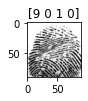

In [ ]:
img_list = sorted(glob.glob('/content/gdrive/MyDrive/Fingerprint_Recognition/SOCOFing/Altered/Altered-Hard/*.BMP'))
print(len(img_list))

imgs = np.empty((len(img_list), 90, 90, 1), dtype=np.uint8)
labels = np.empty((len(img_list), 4), dtype=np.uint16)

for i, img_path in enumerate(img_list):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = img[2:99,2:92] # 그림 주위의 테두리 제거
    img = cv2.resize(img, (90, 90))
    img = img.flatten()
    imgs[i] = img.reshape(90, 90, -1)
        
    # subject_id, gender, lr, finger
    labels[i] = extract_label2(img_path)
    
np.save('/content/gdrive/MyDrive/Fingerprint_Recognition/dataset/x_hard.npy', imgs)
np.save('/content/gdrive/MyDrive/Fingerprint_Recognition/dataset/y_hard.npy', labels)

print(imgs.shape)
plt.figure(figsize=(1, 1))
plt.title(labels[-1])
plt.imshow(imgs[-1].squeeze(), cmap='gray')

In [ ]:
!ls /content/gdrive/MyDrive/Fingerprint_Recognition/dataset/

x_easy.npy  x_medium.npy  y_easy.npy  y_medium.npy
x_hard.npy  x_real.npy	  y_hard.npy  y_real.npy
